# Cleaning up the Zillow Inventory & Median Sales Data for Metro US 


## 2.1 Contents<a id='2.1_Contents'></a>
* [2.1 About the dataset](#2.1About)
  * [Data Cleaning](2.3_Data_Cleaning) [link text](Data Cleaning)
  * [2.1 Introduction - About the dataset](#2.2_Introduction)
    * [2.2.1 Recap Of Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
    * [2.2.2 Introduction To Notebook](#2.2.2_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)

<a name="2.1About"></a>
# About the data

This dataset is housing data that was downloaded from the Zillow research [website](https://www.zillow.com/research/data/).  The data used in this notebook are the weekly inventory (# of houses for sale) and median sale prices for 97 metro regions in the United States. 

This is the raw data, and has not been smoothed. 

This notebook will focus on collecting the data, organizing it, and making sure the dataframes are well defined for EDA and modeling. 

The final analysis will focus on the housing market in Texas. The majority of the data cleaning will focus on looking at data from this state. 






We'll need to import OS if the notebook is being loaded on a Windows PC.  Otherwise it can be omitted.  The other libraries (pandas, matplotlib, seaborn, etc) are necessary. 

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#This is for loading the data on a windows computer. 
"""cwd_path = os.getcwd()
data_path = cwd_path[:-9] + '\\data\\raw'
data_file = 'Metro_invt_fs_uc_sfrcondo_raw_week.csv'

file_path = data_path + '\\' + data_file
os.chdir(data_path)
os.listdir()"""


"cwd_path = os.getcwd()\ndata_path = cwd_path[:-9] + '\\data\\raw'\ndata_file = 'Metro_invt_fs_uc_sfrcondo_raw_week.csv'\n\nfile_path = data_path + '\\' + data_file\nos.chdir(data_path)\nos.listdir()"

<a name="cell-id"></a>
The following code is used to load the csv files from Google Drive. 

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The median and inventory data will be loaded into separate dataframes. 



In [10]:
filename_median = 'Metro_median_sale_price_uc_SFR_raw_week.csv'
filename_inventory = 'Metro_invt_fs_uc_sfrcondo_raw_week.csv'
rawdata_path = '/content/drive/My Drive/colab/zillow/data/raw/'

mediansales_path= rawdata_path+filename_median
inventory_path = rawdata_path+filename_inventory

#df_med will contain the median sales price 
df_med = pd.read_csv(mediansales_path)

#df_inv will contain the weekly inventory of available houses 
df_inv = pd.read_csv(inventory_path)

In [11]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 671 entries, RegionID to 2020-10-31
dtypes: float64(666), int64(2), object(3)
memory usage: 508.6+ KB


In [12]:
df_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Columns: 169 entries, RegionID to 2020-11-28
dtypes: float64(164), int64(2), object(3)
memory usage: 128.2+ KB


In [13]:
print('Median Sales Price DF ', df_med.nunique())
print()
print('Inventory Sales DF', df_inv.nunique())

Median Sales Price DF  RegionID      97
SizeRank      97
RegionName    97
RegionType     2
StateName     40
              ..
2020-10-03    85
2020-10-10    90
2020-10-17    90
2020-10-24    87
2020-10-31    89
Length: 671, dtype: int64

Inventory Sales DF RegionID      97
SizeRank      97
RegionName    97
RegionType     2
StateName     40
              ..
2020-10-31    94
2020-11-07    96
2020-11-14    96
2020-11-21    96
2020-11-28    97
Length: 169, dtype: int64


It looks like there is some missing data.  Each datatime entry should have 97 data points. 

<a id='2.3_Data_Cleaning'></a>
# Cleaning up the Zillow Inventory Data for Metro Regions
The data is loaded in wide format. 
Cleaning the data: 

*   Melt the timestamp data and use as the index
*   Convert the timestamp data into type datetime.
*   Look for missing values
*   Drop irrelevant columns
*   Make a list of regions separate from the dataframe to reduce redundancy and clean up the dataframe. 


In [15]:
df_inv.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2017-10-14,2017-10-21,2017-10-28,2017-11-04,2017-11-11,2017-11-18,2017-11-25,2017-12-02,2017-12-09,2017-12-16,2017-12-23,2017-12-30,2018-01-06,2018-01-13,2018-01-20,2018-01-27,2018-02-03,2018-02-10,2018-02-17,2018-02-24,2018-03-03,2018-03-10,2018-03-17,2018-03-24,2018-03-31,2018-04-07,2018-04-14,2018-04-21,2018-04-28,2018-05-05,2018-05-12,2018-05-19,2018-05-26,2018-06-02,2018-06-09,...,2020-02-29,2020-03-07,2020-03-14,2020-03-21,2020-03-28,2020-04-04,2020-04-11,2020-04-18,2020-04-25,2020-05-02,2020-05-09,2020-05-16,2020-05-23,2020-05-30,2020-06-06,2020-06-13,2020-06-20,2020-06-27,2020-07-04,2020-07-11,2020-07-18,2020-07-25,2020-08-01,2020-08-08,2020-08-15,2020-08-22,2020-08-29,2020-09-05,2020-09-12,2020-09-19,2020-09-26,2020-10-03,2020-10-10,2020-10-17,2020-10-24,2020-10-31,2020-11-07,2020-11-14,2020-11-21,2020-11-28
0,102001,0,United States,Country,NaN,1329553.0,1324548.0,1308531.0,1303129.0,1286621.0,1272333.0,1234947.0,1227505.0,1195416.0,1160149.0,1148194.0,1093337.0,1093250.0,1087475.0,1087958.0,1094620.0,1106129.0,1105860.0,1115048.0,1118538.0,1142503.0,1128157.0,1188209.0,1180119.0,1181779.0,1215663.0,1235118.0,1251990.0,1264064.0,1287461.0,1292470.0,1309224.0,1317716.0,1312313.0,1342281.0,...,1088469.0,1102433.0,1109522.0,1112495.0,1101957.0,1098407.0,1081841.0,1081417.0,1081583.0,1072815.0,1099381.0,1105393.0,1094354.0,1076661.0,1088115.0,1075586.0,1065208.0,1050500.0,1034941.0,1025225.0,1022963.0,1011201.0,999848.0,986761.0,979604.0,973036.0,965538.0,974262.0,951523.0,955963.0,946262.0,931097.0,924736.0,916975.0,909612.0,891672.0,874996.0,861239.0,847452.0,802818.0
1,394913,1,"New York, NY",Msa,NY,67462.0,67333.0,66334.0,65836.0,64317.0,63556.0,61355.0,61132.0,59148.0,57239.0,55864.0,53023.0,52815.0,52195.0,52794.0,53632.0,54821.0,58028.0,57679.0,57985.0,61192.0,60462.0,63044.0,62923.0,64013.0,64969.0,66129.0,68286.0,69644.0,71628.0,72056.0,73438.0,73499.0,73989.0,75705.0,...,62055.0,62682.0,63978.0,62458.0,63565.0,60083.0,57016.0,56033.0,55285.0,55205.0,56029.0,56237.0,55877.0,56161.0,58371.0,59000.0,59862.0,61344.0,61739.0,62977.0,63472.0,64409.0,63913.0,63273.0,64047.0,64308.0,64710.0,64749.0,65020.0,65717.0,65793.0,65908.0,66114.0,65429.0,65258.0,64337.0,63000.0,62334.0,61324.0,58814.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,18029.0,17845.0,17296.0,17018.0,16648.0,16415.0,15440.0,15306.0,14660.0,13767.0,13532.0,11851.0,12137.0,12805.0,13341.0,13724.0,14108.0,14699.0,14814.0,15071.0,15440.0,15020.0,16622.0,16186.0,15990.0,16756.0,17188.0,17834.0,17987.0,18620.0,18753.0,19175.0,19281.0,19303.0,20084.0,...,15426.0,15679.0,15595.0,15400.0,14604.0,14634.0,14576.0,14879.0,14945.0,15057.0,16094.0,16561.0,16978.0,17043.0,17479.0,17489.0,17531.0,17319.0,17180.0,17236.0,17409.0,17448.0,17439.0,17321.0,17384.0,17323.0,17309.0,17610.0,17444.0,17623.0,17673.0,17070.0,17188.0,17489.0,17623.0,17579.0,16702.0,16422.0,15988.0,14896.0
3,394463,3,"Chicago, IL",Msa,IL,38109.0,37722.0,37182.0,36553.0,35480.0,34548.0,32984.0,32434.0,31344.0,29967.0,29215.0,27315.0,26890.0,27151.0,27354.0,27518.0,27781.0,28151.0,28551.0,28878.0,30444.0,30540.0,32798.0,32362.0,32244.0,33349.0,34026.0,34564.0,34660.0,35423.0,35882.0,36361.0,36486.0,36793.0,37738.0,...,32255.0,33160.0,33753.0,33442.0,31761.0,30904.0,30356.0,30439.0,30612.0,30486.0,31685.0,31968.0,31803.0,31542.0,32238.0,32499.0,32568.0,32234.0,31517.0,31894.0,32118.0,31883.0,31579.0,31626.0,31307.0,31671.0,31452.0,31645.0,31269.0,31733.0,31633.0,31539.0,31627.0,31178.0,30902.0,30124.0,29637.0,28873.0,28088.0,26337.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,22104.0,21804.0,21751.0,21687.0,20961.0,20834.0,20066.0,19754.0,18977.0,18075.0,17977.0,16345.0,16091.0,16371.0,16718.0,16988.0,17332.0,17200.0,17490.0,17329.0,17547.0,17149.0,19088.0,19007.0,19150.0,20710.0,21092.0,21812.0,22182.0,22496.0,22723.0,23213.0,23466.0,23568.0,24259.0,...,24403.0,24831.0,25172.0,25107.0,24393.0,23987.0,23549.0,23786.0,24083.0,24040.0,25456.0,2

The dataframe is in a wide format that can be difficult to manipulate. We'll melt the dataframe and have the datetime become the index.  

In [16]:
#city_acronyms = {'NYC':'New York', 'SATX':'San Antonio', 'DFW':'Dallas-Fort Worth', 'ATX':'Austin'}

At a later point, the city acronyms will be used to label the columns to make things easier, for now the full city/metro names will be used. 


A list of the unique values in the RegionName column is needed. A list will be created and stored into a dictionary that can be called later. 

In [17]:
#Take the region names and turn it into a list and create a dictionary that will be used to store the city/state as key/values. 
regions = df_inv.RegionName.tolist()
region_state= {}

In [18]:
# Split the string "CITY, STATE" into "CITY" & " STATE"
# strip_state can be called to remove the leading whitespace in " STATE"
for city in regions:
  try:
    region_state[city.split(',', 1)[0]] = city.split(',', 1)[1].strip()
  except:
    pass
region_state



{'Akron': 'OH',
 'Albany': 'NY',
 'Albuquerque': 'NM',
 'Allentown': 'PA',
 'Atlanta': 'GA',
 'Augusta': 'GA',
 'Austin': 'TX',
 'Bakersfield': 'CA',
 'Baltimore': 'MD',
 'Baton Rouge': 'LA',
 'Birmingham': 'AL',
 'Boise City': 'ID',
 'Boston': 'MA',
 'Buffalo': 'NY',
 'Charleston': 'SC',
 'Charlotte': 'NC',
 'Chicago': 'IL',
 'Cincinnati': 'OH',
 'Cleveland': 'OH',
 'Colorado Springs': 'CO',
 'Columbia': 'SC',
 'Columbus': 'OH',
 'Dallas-Fort Worth': 'TX',
 'Dayton': 'OH',
 'Daytona Beach': 'FL',
 'Denver': 'CO',
 'Des Moines': 'IA',
 'Detroit': 'MI',
 'El Paso': 'TX',
 'Fort Collins': 'CO',
 'Fort Myers': 'FL',
 'Fresno': 'CA',
 'Grand Rapids': 'MI',
 'Greensboro': 'NC',
 'Greenville': 'SC',
 'Harrisburg': 'PA',
 'Hartford': 'CT',
 'Houston': 'TX',
 'Indianapolis': 'IN',
 'Jackson': 'MS',
 'Jacksonville': 'FL',
 'Kansas City': 'MO',
 'Knoxville': 'TN',
 'Lakeland': 'FL',
 'Las Vegas': 'NV',
 'Little Rock': 'AR',
 'Los Angeles-Long Beach-Anaheim': 'CA',
 'Louisville-Jefferson County':

In [19]:
def strip_space(name):
  """ This function strips the leading space from the text. """
  return name.split(',', 1)[0]

In [20]:
#The columns that will be dropped from the dataframe after melting. 
drop_columns = ['RegionName', 'SizeRank', 'StateName']

df_inv.drop(columns=['RegionID', 'RegionType'], inplace=True)
df_med.drop(columns=['RegionID', 'RegionType'], inplace=True)

In [22]:
def extract_region(regionname, df, drop_col, suffix=''):
  """regionname: Name of the region to be extracted. 
     df: The data frame containing the raw original data 
     drop_col: columns to be dropped after melting """

  # The function will do the following. 
  # Extracts the specified region from the zillow data
  # Melts dataframe
  # sets index to data timestamp 
  # Returns a dataframe
  
  
  # Creates a filter for to work with the specified regionname. 
  filterdf = df[df['RegionName']==regionname]
    
  tempmelt = pd.melt(filterdf, id_vars = ['RegionName', 'SizeRank', 'StateName'])
    
  #create a date column using the timestamp data 
  tempmelt['date'] = pd.to_datetime(tempmelt['variable'])
    
  #set the index to date 
  tempmelt.set_index('date', inplace=True)
    
  #drop the columns and variable from the df
  tempmelt.drop(columns=drop_col, inplace=True)
  tempmelt.drop(columns=['variable'], inplace=True)
    
  #extract the metro name from regionname 
  tempregion = strip_space(regionname)
    
  #creat the new name for the column 
  newname = tempregion + '_' + suffix

  #rename the column in place 
  tempmelt.rename(columns={'value':newname}, inplace=True)
    
  return tempmelt

find_roi will provide all the regions for the given state.  This makes it easier to extract the data for a given state. Since we're looking at the data for Texas, we need an easy way to pull all the metro/cities from TX. 


In [23]:
#This will find the regions for the specified state and return a list of regions

def find_roi(state):
    roi = [r for r in regions if state in r]
    return roi


In [24]:
tx_regions = find_roi('TX')
tx_regions


['Dallas-Fort Worth, TX',
 'Houston, TX',
 'San Antonio, TX',
 'Austin, TX',
 'El Paso, TX',
 'McAllen, TX']

There are only 6 TX metro regions in the data set.  

In [25]:
ca_regions = find_roi('CA')
ca_regions

['Los Angeles-Long Beach-Anaheim, CA',
 'San Francisco, CA',
 'Riverside, CA',
 'San Diego, CA',
 'Sacramento, CA',
 'San Jose, CA',
 'Fresno, CA',
 'Bakersfield, CA',
 'Ventura, CA',
 'Stockton, CA']

In [26]:
wi_regions = find_roi('WI')
wi_regions

['Milwaukee, WI', 'Madison, WI']

In [27]:
ny_regions = find_roi('NY')
ny_regions

['New York, NY', 'Buffalo, NY', 'Rochester, NY', 'Albany, NY', 'Syracuse, NY']

In [28]:
#Test the function to and make sure everything is working as intended. 

nyc = extract_region('New York, NY', df_inv, drop_columns, suffix='Inv')

Everything looks good with the nyc dataframe. 

In [29]:
nyc.head()

,New York_Inv
date,
2017-10-14,67462.0
2017-10-21,67333.0
2017-10-28,66334.0
2017-11-04,65836.0
2017-11-11,64317.0


In [30]:
def listofRegions(regions, data='', drop_col='', suffix=''):
  regionlist = list()
  for i in regions:
    regionlist.append(extract_region(i,data, drop_col=drop_columns, suffix=suffix))
  return regionlist

#tx_df_list = list()
#for i in tx_regions:
#    tx_df_list.append(extract_region(i, data, drop_col=drop_columns, suffix=suffix))
tx_df_list = listofRegions(tx_regions, data=df_inv, drop_col=drop_columns, suffix='Inv', )    
tx = pd.concat(tx_df_list, axis=1)


In [31]:
tx.dtypes

Dallas-Fort Worth_Inv    float64
Houston_Inv              float64
San Antonio_Inv          float64
Austin_Inv               float64
El Paso_Inv              float64
McAllen_Inv              float64
dtype: object

In [32]:
tx.index

DatetimeIndex(['2017-10-14', '2017-10-21', '2017-10-28', '2017-11-04',
               '2017-11-11', '2017-11-18', '2017-11-25', '2017-12-02',
               '2017-12-09', '2017-12-16',
               ...
               '2020-09-26', '2020-10-03', '2020-10-10', '2020-10-17',
               '2020-10-24', '2020-10-31', '2020-11-07', '2020-11-14',
               '2020-11-21', '2020-11-28'],
              dtype='datetime64[ns]', name='date', length=164, freq=None)

The index has been set to a datetime. The columns are all numeric. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcafcbed0b8>],
      dtype=object)

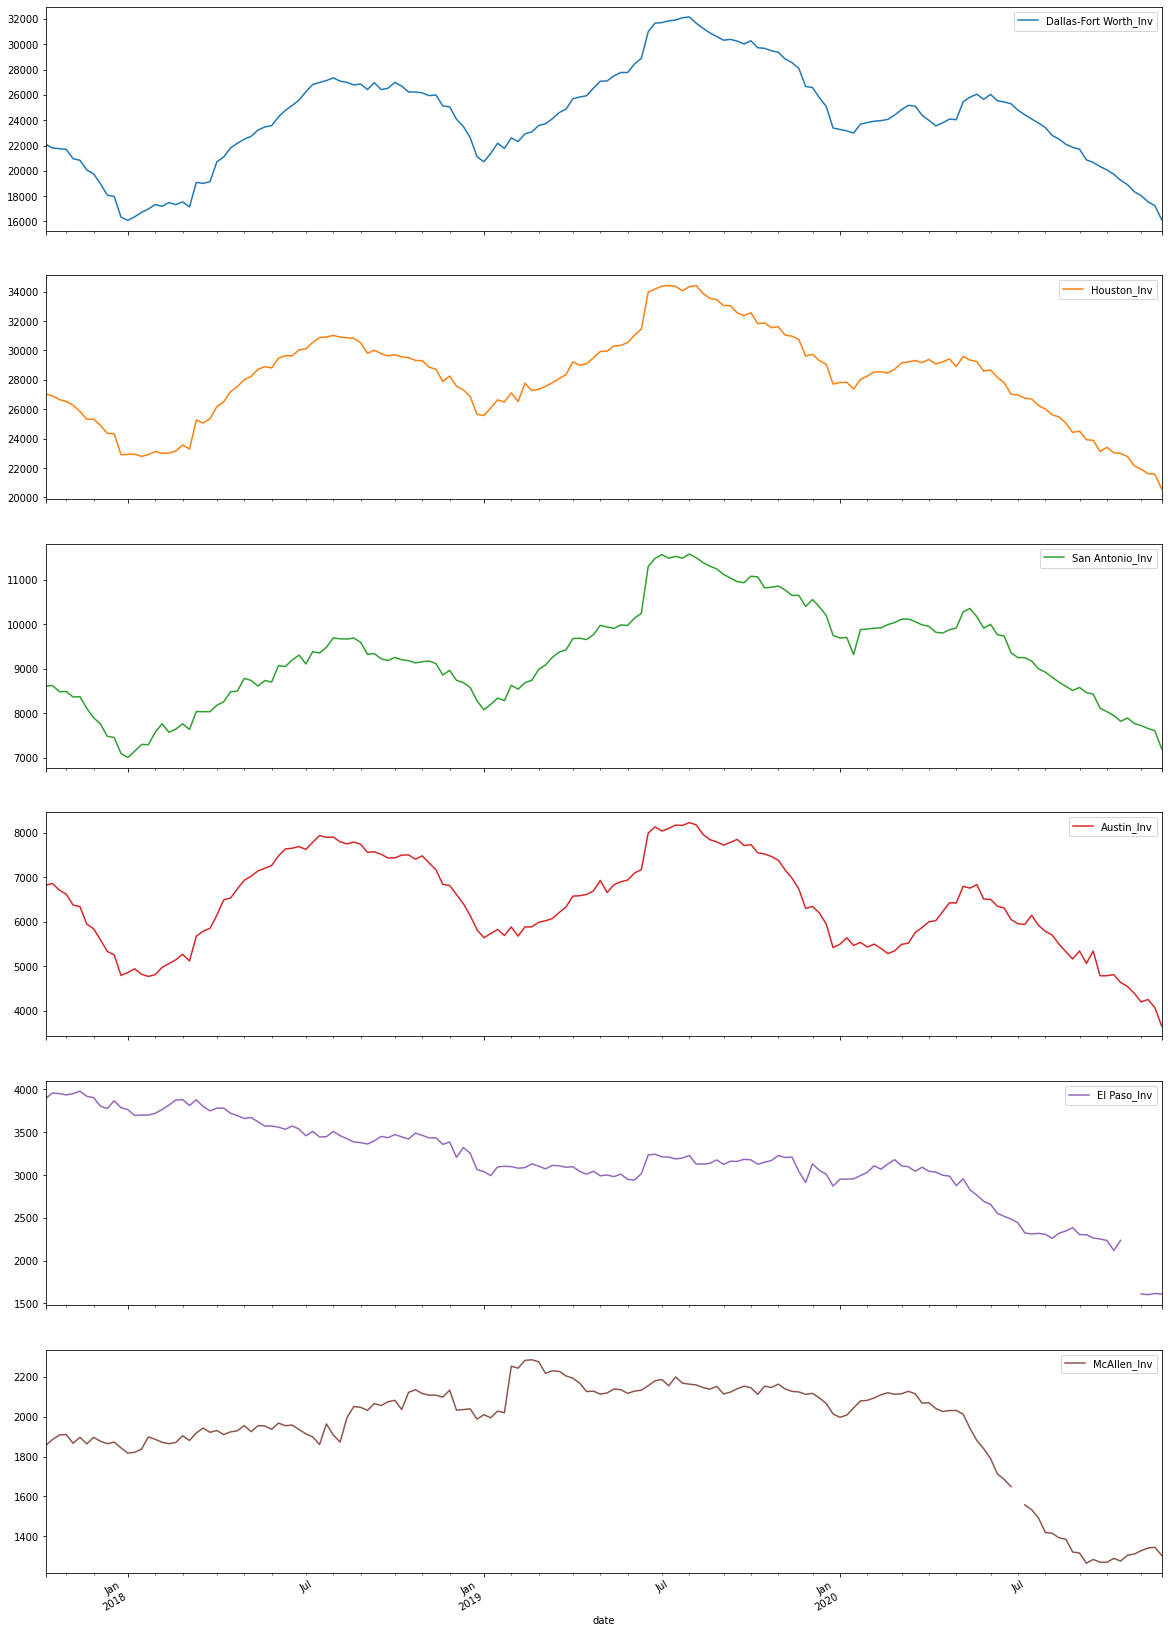

In [33]:
tx.plot(subplots=True, layout=(6,1), figsize=(20,32), sharex=True, sharey=False)

McAllen and El Paso show some missing data, we'll clean these up and interpolate the values. 


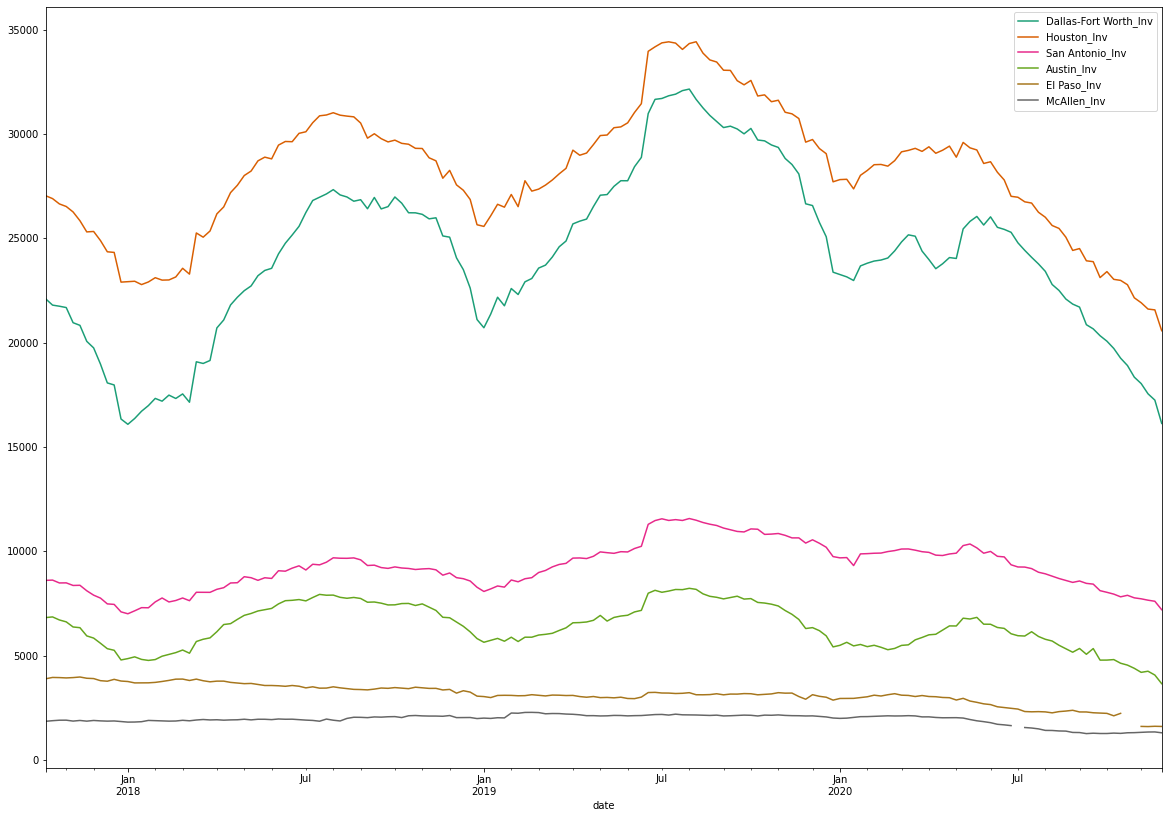

In [34]:
tx.plot(figsize=(20,14), colormap='Dark2')


In [35]:
tx.columns

Index(['Dallas-Fort Worth_Inv', 'Houston_Inv', 'San Antonio_Inv', 'Austin_Inv',
       'El Paso_Inv', 'McAllen_Inv'],
      dtype='object')

We're only missing two values from the El Paso time series and one value from the McAllen time series. We'll use a linear interpolation to fill in the missing values. 

In [36]:
tx['McAllen_Inv'].isna().sum()

1

In [37]:
tx['El Paso_Inv'].isna().sum()

2

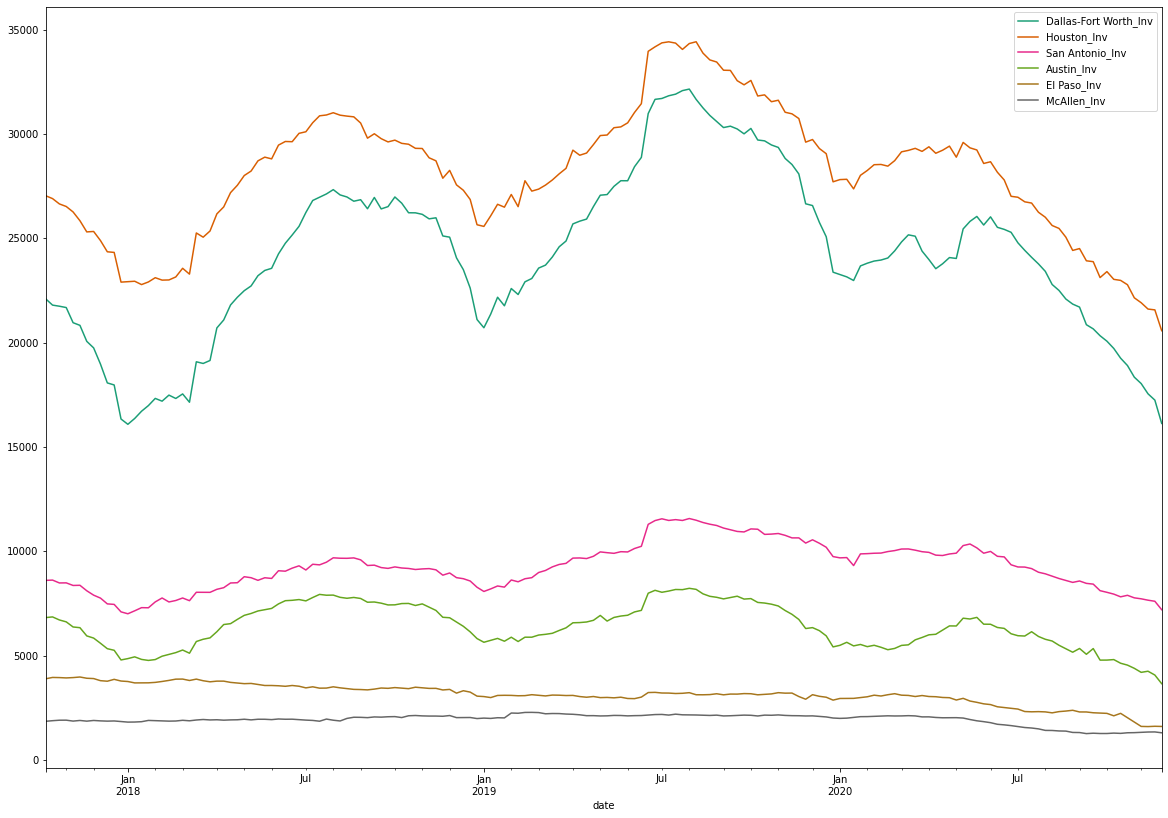

In [38]:
tx.interpolate(method='linear', limit_direction='forward', axis=0).plot(figsize=(20,14), colormap='Dark2')


The interpolation looks good, so we'll assign the new dataframe to itself. 

In [39]:
tx = tx.interpolate(method='linear', limit_direction='forward', axis=0)

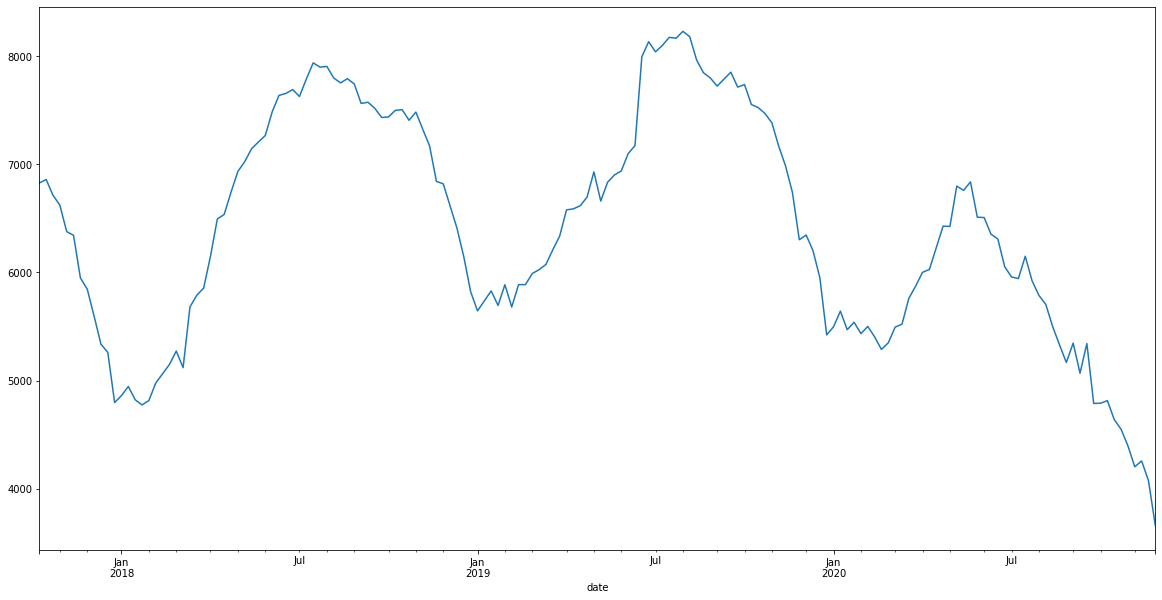

In [49]:
plt.figure(figsize=(20,10))
tx['Austin_Inv'].plot()
plt.show()

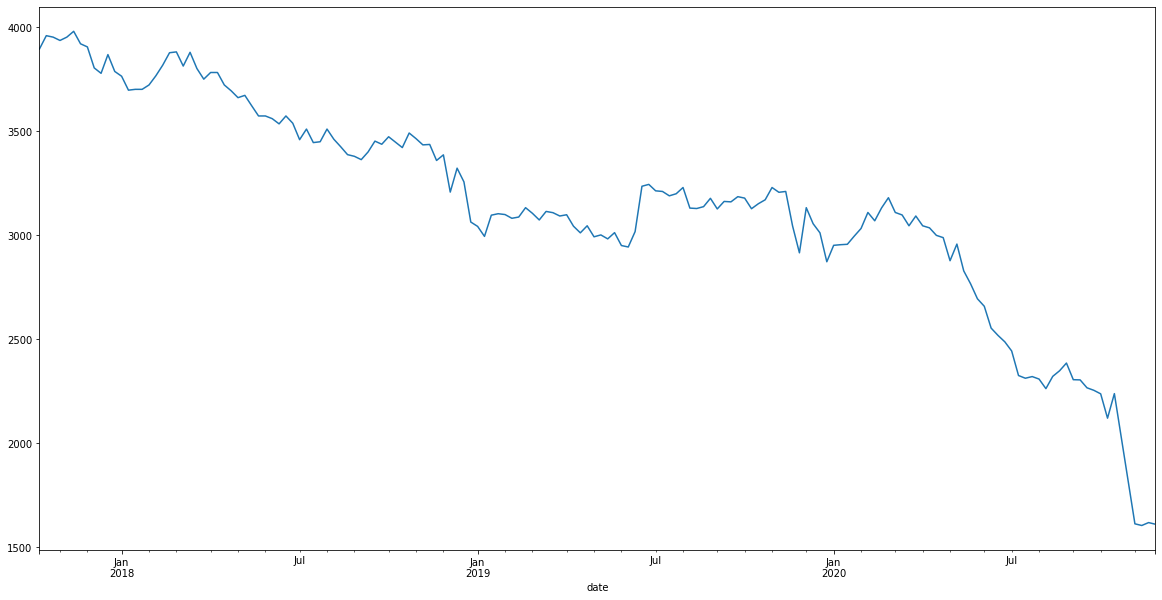

In [50]:
plt.figure(figsize=(20,10))
tx['El Paso_Inv'].plot()
plt.show()

In [52]:
tx['El Paso_Inv'].isna().sum()

0

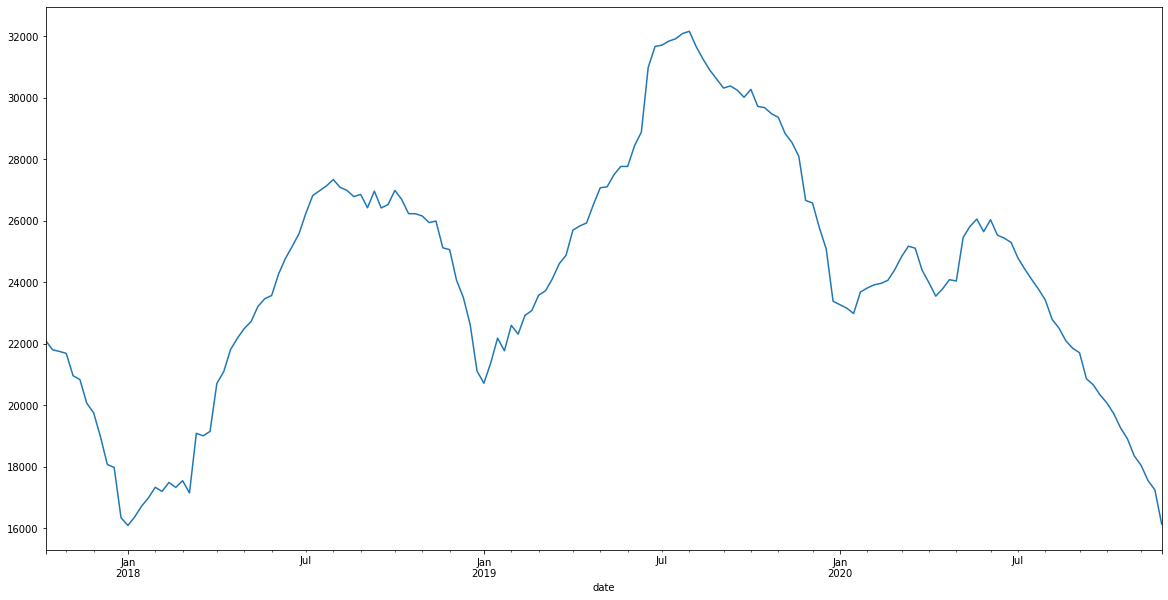

In [53]:
plt.figure(figsize=(20,10))
tx['Dallas-Fort Worth_Inv'].plot()
plt.show()

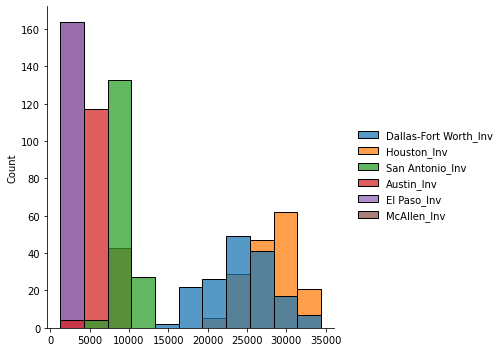

In [59]:
sns.displot(tx)

The distribution corresponds to two different market sizes 

*   DFW & Houston
*   San Antonio & Austin





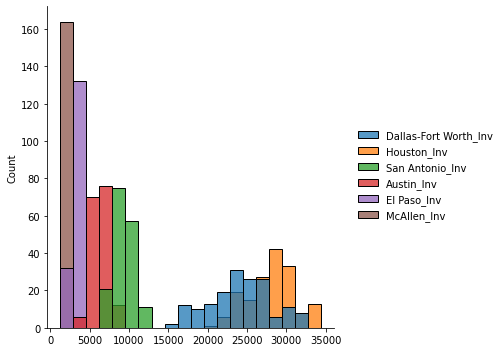

In [60]:
sns.displot(tx, bins=20)

# Cleaning the median sales price data

The median sales data will be cleaned up using the same functions that were created for cleaning the inventory data. 